# Analysis of Variance Test (ANOVA) - one way 

There are sometimes situations where we may have multiple independent data samples.

We can perform the Student’s t-test pairwise on each combination of the data samples to get an idea of which samples have different means. This can be onerous if we are only interested in whether all samples have the same distribution or not.

To answer this question, we can use the analysis of variance test, or ANOVA for short. ANOVA is a statistical test that assumes that the mean across 2 or more groups are equal. If the evidence suggests that this is not the case, the null hypothesis is rejected and at least one data sample has a different distribution.

- Fail to Reject H0: All sample distributions are equal.
- Reject H0: One or more sample distributions are not equal.

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

- The samples are independent.
- Each sample is from a normally distributed population.
- The population standard deviations of the groups are all equal. This property is known as homoscedasticity.


Importantly, **the test can only comment on whether all samples are the same or not**; it cannot quantify which samples differ or by how much.

### References:

- [MLMastery: How to Calculate Parametric Statistical Hypothesis Tests in Python](https://machinelearningmastery.com/parametric-statistical-significance-tests-in-python/)
- [One-Way vs. Two-Way ANOVA: When to Use Each](https://www.statology.org/one-way-vs-two-way-anova/)

### Python library:

- [scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

In [34]:
## ANOVA tests
def ANOVA(*args, alpha:float = 0.05, verbose:bool = True):
    """
    The one-way ANOVA tests the null hypothesis that two or more groups have the same 
    population mean. The test is applied to samples from two or more groups, possibly 
    with differing sizes.
    *args -- n groups of samples.
    alpha -- to reject or not the test.
    verbose -- display extra information (default, True).
    """
    from scipy.stats import f_oneway
    # test
    stat, p = f_oneway(*args)
    # display
    if verbose:
        print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    if p > alpha:
        print(f'Same distributions (fail to reject H0 with alpha = {alpha})')
    else:
        print(f'Different distributions (reject H0 with alpha = {alpha})')


In [37]:
from numpy.random import seed
from numpy.random import randn
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

## ANOVA tests
ANOVA(data1, data2, data3, alpha = 0.05, verbose = True)
ANOVA(data1, data2, alpha = 0.05, verbose = True)

Statistics=3.655, p=0.027
Different distributions (reject H0 with alpha = 0.05)
Statistics=0.510, p=0.476
Same distributions (fail to reject H0 with alpha = 0.05)


# Analysis of Variance Test (ANOVA) from scratch

> NOTA: This is very interesting to learning purpose but it is not working very good. Require a alpha to large to detect differences

### References:

- [TowardsDataScience: Analysis of Variance — ANOVA with Python](https://towardsdatascience.com/analysis-of-variance-anova-8dc889d2fc3a)

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import f

# arguments
alpha = 0.1
verbose = True
# data
df = pd.DataFrame.from_dict({'g1': [5,9,10,12,8,8,9], 
                        'g2': [5,4, 4, 5,5,4,8], 
                        'g3': [9,8, 5, 6,7,7,6]})

# get dimessions
m = df.shape[1]
n = df.shape[0]

# the sum of the squared distance between each data point and the mean of the dataset
SST = np.sum(np.sum((df - np.mean(np.mean(df)))**2))
# its degrees of freedom
df_sst = m*n-1

# the sum of the squared distance between each data point and the respective group mean
SSW = np.sum(np.sum((df - np.mean(df))**2))
# its degrees of freedom
df_ssw = m*(n-1)

# the sum of the squared distance between each group mean and the mean of the dataset for each data point
SSB = np.sum(np.sum((np.tile(np.mean(df), (3,1)) - np.mean(np.mean(df)))**2))
# its degrees of freedom
df_ssb = m-1

# F-statistic
F = (SSB/df_ssb)/(SSW/df_ssw)
# Percent Point Function of F
f_ppf = f.ppf(0.95, dfn=df_ssb, dfd=df_ssw)

# p-value
p_value = (1 - f.cdf(F, dfn=df_ssb, dfd=df_ssw))*2
# interpret
if p_value > alpha:
    print(f'Same distributions (fail to reject H0 with alpha = {alpha})')
else:
    print(f'Different distributions (reject H0 with alpha = {alpha})')
    

Different distributions (reject H0 with alpha = 0.1)


# Multivariable Analysis of Variance Test (MANOVA) - one way

MANOVA is a multivariate version of the ANOVA model. Multivariate here indicates the fact that there are multiple dependent variables instead of just one.

As in all statistical models, there are a few **assumptions** to take into account. In MANOVA, the assumptions are:

- Independent and identically distributed random variables.
- Every samples follow a multivariate normal distribution (within each group).
- Equal population covariance matrices between each group (the multivariate alternative to homogeneity of variances in ANOVA). If this assumption is met, it is generally advice to use Pillai’s trace, whereas you should default to Wilk’s lambda otherwise.

Importantly, **the test can only comment on whether all samples are the same or not**; it cannot quantify which samples differ or by how much.

### References:

- [MANOVA using Python (using statsmodels and sklearn)](https://www.reneshbedre.com/blog/manova-python.html)
- [TowardDataScience: MANOVA](https://towardsdatascience.com/manova-97e675a96158)
- [Python MANOVA Made Easy using Statsmodels](https://www.marsja.se/python-manova-made-easy-using-statsmodels/)

In [56]:
!pip install dfply

     |████████████████████████████████| 612 kB 2.2 MB/s eta 0:00:01


In [59]:
import pandas as pd
from dfply import *

### load data

In [57]:
# load data from url
df=pd.read_csv("https://reneshbedre.github.io/assets/posts/ancova/manova_data.csv")
print(df.head())

  plant_var  height  canopy_vol
0         A    20.0        0.70
1         A    22.0        0.80
2         A    24.0        0.95
3         A    18.0        0.60
4         A    20.0        0.74


### data summarization

In [60]:
# summary statistics for dependent variable height 
df >> group_by(X.plant_var) >> summarize(n=X['height'].count(), mean=X['height'].mean(), std=X['height'].std())

,plant_var,n,mean,std
0,A,10,18.90,2.923088
1,B,10,16.54,1.920185
2,C,10,3.05,1.039498
3,D,10,9.35,2.106735


In [61]:
# summary statistics for dependent variable canopy_vol 
df >> group_by(X.plant_var) >> summarize(n=X['canopy_vol'].count(), mean=X['canopy_vol'].mean(), std=X['canopy_vol'].std())

,plant_var,n,mean,std
0,A,10,0.784,0.121308
1,B,10,0.608,0.096816
2,C,10,0.272,0.143279
3,D,10,0.474,0.094540


### data visualization

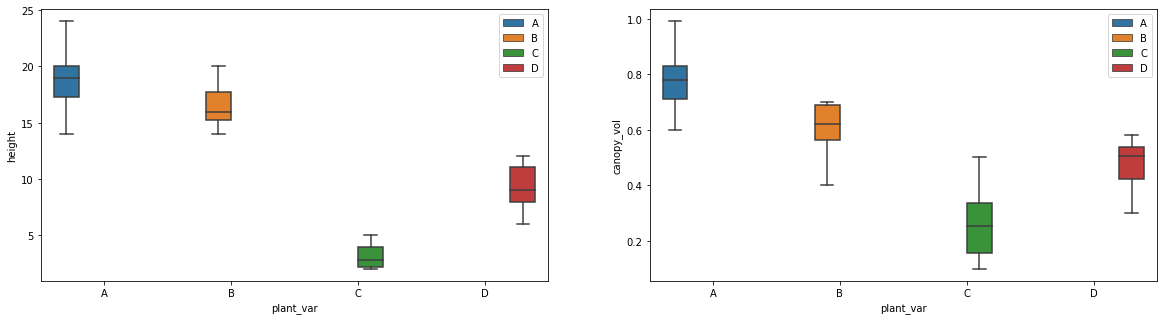

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, figsize = (20, 5))
sns.boxplot(data=df, x="plant_var", y="height", hue=df.plant_var.tolist(), ax=axs[0])
sns.boxplot(data=df, x="plant_var", y="canopy_vol", hue=df.plant_var.tolist(), ax=axs[1])
plt.show()

### MANOVA test

In [68]:
from statsmodels.multivariate.manova import MANOVA
import warnings
warnings.filterwarnings('ignore')

fit = MANOVA.from_formula('height + canopy_vol ~ plant_var', data=df)
print(fit.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
         Pillai's trace  1.0365 6.0000 72.0000  12.9093 0.0000
 Hotelling-

### Understanding the output of the MANOVA in Python

Now in Python, using *statsmodels* library, the output shows the analysis using different test statistics. The second one, **Pillai’s trace**, is the one that we saw in the R output as well. Pillai’s trace is know to be relatively conservative: it gives a significant result less easily (the differences have to be bigger to obtain significant output).

The **Wilks’ Lambda** is another often-used test statistic. **Hotelling-Lawley trace** and **Roy’s greatest root** are also alternative options. There is no absolute consensus in the statistical literature as to which test statistic should be preferred.

> NOTA: If the assumption *"Equal population covariance matrices between each group"* is met, it is generally advice to use Pillai’s trace, whereas you should default to Wilk’s lambda otherwise. Wilk’s lambda is the most popular.
 
The p-values are shown in the right column and are all inferior to 0.05, which confirms that treatment has an impact on plant growth.
    
  

### MANOVA tool

In [124]:
## get results from one test from fitted MANOVA
def test_result(manova_fit:'fitted manova', name_test:str)->(float, float):
    """
    Get results from one test from fitted MANOVA. These are avaiable: "Roy's greatest root",
    "Pillai's trace", "Wilks' lambda", 'Hotelling-Lawley trace'.
    
    manova_fit -- fitted manova test.
    name_test -- name of setected test.
    return -- (F value, p-value)
    """
    # validate test name
    assert name_test in ["Roy's greatest root","Pillai's trace","Wilks' lambda",'Hotelling-Lawley trace']
    # get F and p-values
    temp = manova_fit.mv_test().summary_frame.reset_index()
    F, p = temp[(temp.Statistic == name_test) & ~(temp.Effect == "Intercept")][['F Value', 'Pr > F']].values.ravel()
    # return
    return (F, p)


## prepare formula to be used in MANOVA
def get_formula(cols_num:list, cols_cat:list)->str:
    """
    Prepare formula to be used in MANOVA.
    cols_num -- list of numeric columns to be inclued in the left side of formula.
    cols_cat -- list of categorical columns to be included in the right side of formula.
    return -- formula.
    """
    # initialize numeric side
    formula = '%s'%cols_num[0]
    # add more elements
    if len(cols_num)>1:
        for c in cols_num[1:]:
            formula += ' + %s'%c
    # initialize categoric side        
    formula += ' ~ %s'%cols_cat[0]
    # add more elements
    if len(cols_cat)>1:
        for c in cols_cat[1:]:
            formula += ' + %s'%c
    # return
    return formula


## MANOVA tests
def MANOVA(df:pd.DataFrame, 
           cols_num:list, cols_cat:list, 
           alpha:float = 0.05, 
           name_test:str = "Pillai's trace", 
           verbose:bool = True):
    """
    The one-way MANOVA tests ("Roy's greatest root",
    "Pillai's trace", "Wilks' lambda", 'Hotelling-Lawley trace').
    df -- dataframe of data.
    cols_num -- list of numerical columns.
    cols_cat -- list of categorical columns.
    alpha -- to reject or not the test.
    verbose -- display extra information (default, True).
    """
    from statsmodels.multivariate.manova import MANOVA
    
    # validate column names
    for c in cols_num + cols_cat:
        assert c in df.columns.tolist()
    # get formula
    formula = get_formula(cols_num, cols_cat)
    # fit manova
    fit = MANOVA.from_formula(formula, data=df)
    if len(cols_cat) == 1:
        # get results
        F, p = test_result(fit, name_test)
        # display
        if verbose:
            print('FORMULA: "%s"'%formula)
            print('Statistics=%.3f, p=%.3f\n' % (F, p))
            print(fit.mv_test())
        # interpret
        if p > alpha:
            print(f'Same distributions (fail to reject H0 with alpha = {alpha})')
        else:
            print(f'Different distributions (reject H0 with alpha = {alpha})')
    else:
        print(fit.mv_test())


In [126]:
cols_cat = ['plant_var']
cols_num = ['canopy_vol', 'height']
alpha = 0.05
name_test = "Pillai's trace"
verbose = True
MANOVA(df, cols_num, cols_cat, alpha, name_test, verbose)

FORMULA: "canopy_vol + height ~ plant_var"
Statistics=12.909, p=0.000

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 35.0000 450.0766 0.0000
         Pillai's trace  0.9626 2.0000 35.0000 450.0766 0.0000
 Hotelling-Lawley trace 25.7187 2.0000 35.0000 450.0766 0.0000
    Roy's greatest root 25.7187 2.0000 35.0000 450.0766 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
       plant_var         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0797 6.0000 70.0000  29.6513 0.0000
   

# Linear Discriminant Analysis (LDA)

Here we will perform the linear discriminant analysis (LDA) using sklearn to see the differences between each group. For this, LDA is a good complement to MANOVA due to MANOVA cannot quantify which samples differ or by how much.

### References:

- [MANOVA using Python (using statsmodels and sklearn)](https://www.reneshbedre.com/blog/manova-python.html)

prior probabilities of groups: [0.25 0.25 0.25 0.25]
group means: [[18.9    0.784]
 [16.54   0.608]
 [ 3.05   0.272]
 [ 9.35   0.474]]
coefficients of linear discriminants: [[-0.43883736 -0.2751091 ]
 [-1.39491582  9.32562799]]
---> proportion of trace: [0.98545382 0.01454618] <-------------------------


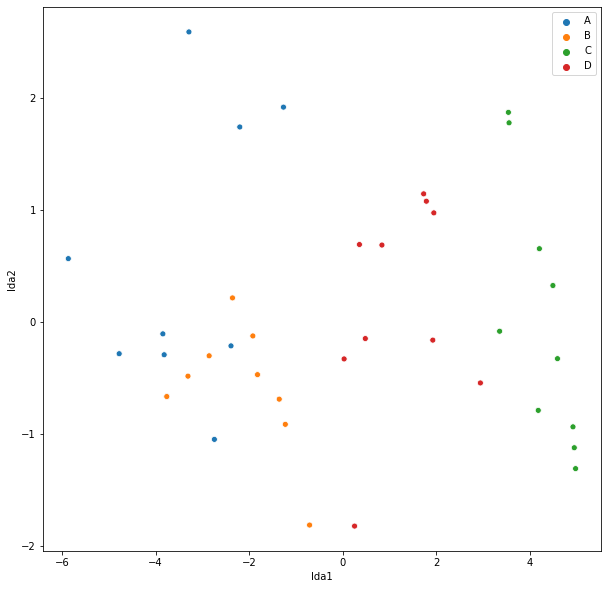

In [134]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
X = df[["height", "canopy_vol"]]
y = df["plant_var"]
post_hoc = lda().fit(X=X, y=y)

# get Prior probabilities of groups:
print("prior probabilities of groups:",post_hoc.priors_)

# get group means
print("group means:",post_hoc.means_)

# get Coefficients of linear discriminants
print("coefficients of linear discriminants:",post_hoc.scalings_)

# get Proportion of trace (variance explained by each of the selected components)
print("---> proportion of trace:",post_hoc.explained_variance_ratio_, "<-------------------------")

# plot 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,10))
X_new = pd.DataFrame(lda().fit(X=X, y=y).transform(X), columns=["lda1", "lda2"])
X_new["plant_var"] = df["plant_var"]
sns.scatterplot(data=X_new, x="lda1", y="lda2", hue=df.plant_var.tolist())
plt.show()
